In [58]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error


In [2]:
# Lendo a base da dados
df = pd.read_csv('../datasets/house_prices.csv')

In [3]:
# Conhecendo o dataframe
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
# Informações do dataframe como dados nulos, nomes e tipos dos features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Contagem de nulos por feature
nulos = df.isnull().sum()
nulos [nulos > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [6]:
# Calculando manualmente proporção de nulos de cada feature
(nulos [nulos > 0] / df.shape[0]) * 100

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [7]:
# Listando todas features categorios
#df.select_dtypes(exclude=np.number).columns.tolist()

In [8]:
# todas colunas exceto target e id(arbitrário)
X = df.drop(columns=['Id', 'SalePrice'])
# target do dataframe -> contínuo que caracteriza uma regressão
y = df['SalePrice']

In [9]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [10]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [11]:
# Dividindo o dataframe em treino e teste para o target e as features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [12]:
# Tamanho da base de dados inicial, treino e teste features e target
X.shape, X_train.shape, X_test.shape, y.shape,y_train.shape, y_test.shape

((1460, 79), (1168, 79), (292, 79), (1460,), (1168,), (292,))

(<AxesSubplot: xlabel='SalePrice', ylabel='Count'>,
 count      1168.000000
 mean     181441.541952
 std       77263.583862
 min       34900.000000
 25%      130000.000000
 50%      165000.000000
 75%      214925.000000
 max      745000.000000
 Name: SalePrice, dtype: float64)

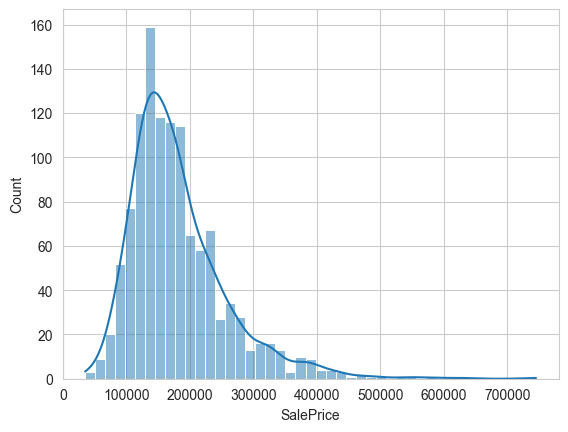

In [13]:
# Distribuição do target com skew positiva (mediana menor que a média)
sns.histplot(y_train, kde=True), y_train.describe()

In [14]:
# skew positiva
y_train.skew()

1.743128561420854

count    1168.000000
mean        5.224846
std         0.169639
min         4.542825
25%         5.113943
50%         5.217484
75%         5.332287
max         5.872156
Name: SalePrice, dtype: float64

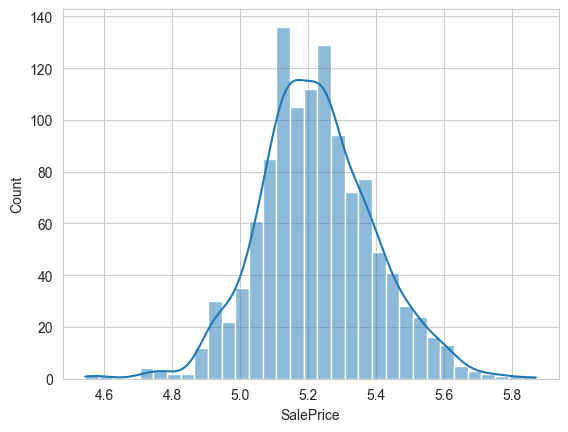

In [15]:
# Extraindo log de 10 do target para obter uma distribuição mais concentrada
log_price = np.log10(y_train)
sns.histplot(log_price, kde=True);
log_price.describe()

C:\Users\Arthur\AppData\Local\Temp\ipykernel_20816\2144423784.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X_train.corr(), annot= True, fmt=".2f");


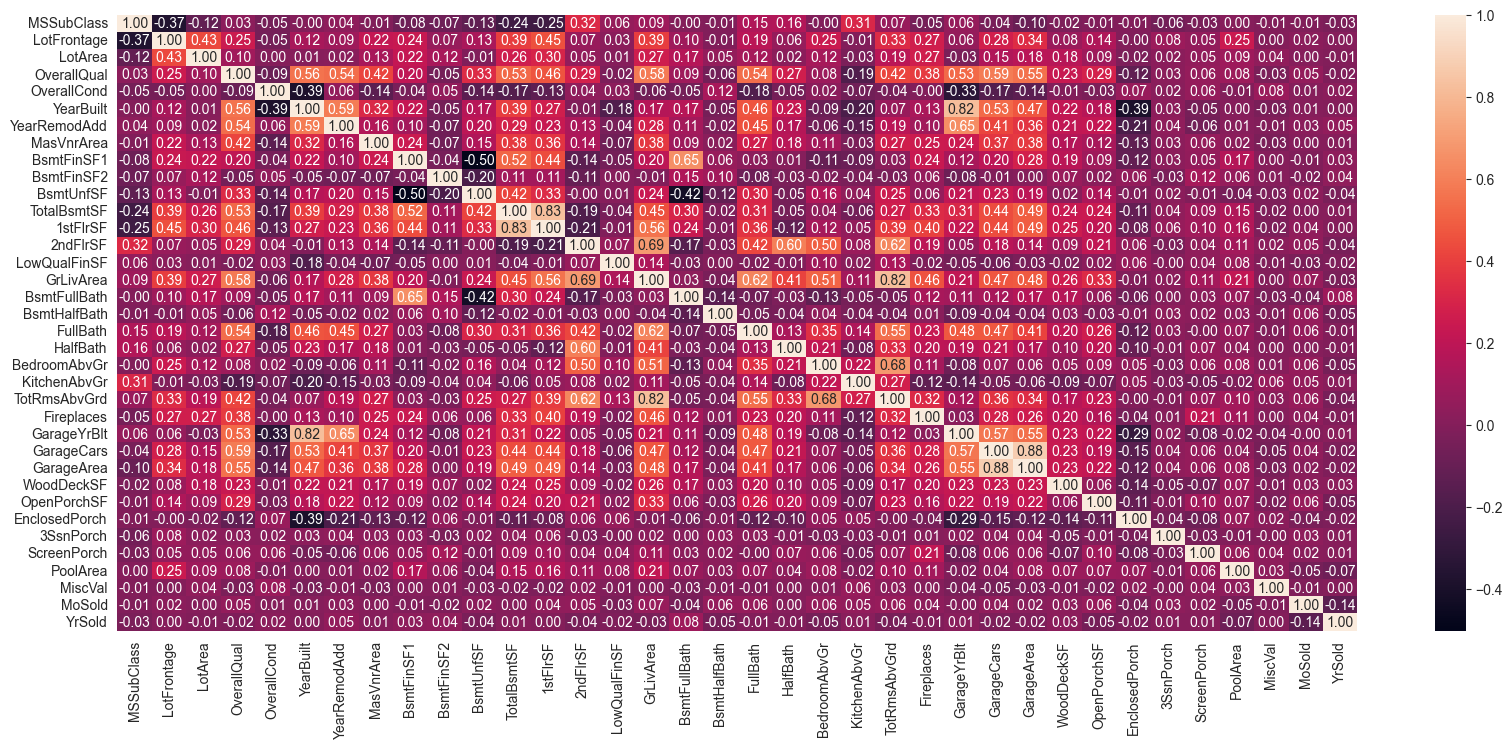

In [16]:
# heatmap da correlação entre todas features
plt.figure(figsize=(20,8))
sns.heatmap(X_train.corr(), annot= True, fmt=".2f");

In [41]:
# Correlação entre as features e o target
corr_feats_target = pd.concat([X_train, y_train], axis=1).corr()['SalePrice'].sort_values(ascending=False)
corr_feats_target

C:\Users\Arthur\AppData\Local\Temp\ipykernel_20816\2426658017.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_feats_target = pd.concat([X_train, y_train], axis=1).corr()['SalePrice'].sort_values(ascending=False)


SalePrice        1.000000
OverallQual      0.791636
GrLivArea        0.728507
TotalBsmtSF      0.644249
GarageCars       0.641793
GarageArea       0.631588
1stFlrSF         0.619552
FullBath         0.554409
TotRmsAbvGrd     0.525357
YearBuilt        0.517393
YearRemodAdd     0.509378
GarageYrBlt      0.481355
MasVnrArea       0.466112
Fireplaces       0.461196
BsmtFinSF1       0.386667
LotFrontage      0.351932
WoodDeckSF       0.330263
2ndFlrSF         0.315503
OpenPorchSF      0.305722
HalfBath         0.281109
LotArea          0.271027
BsmtFullBath     0.228053
BsmtUnfSF        0.222464
BedroomAbvGr     0.156246
PoolArea         0.125642
ScreenPorch      0.119128
3SsnPorch        0.051510
MoSold           0.041469
BsmtFinSF2      -0.005789
YrSold          -0.009046
LowQualFinSF    -0.011214
MiscVal         -0.020198
BsmtHalfBath    -0.048399
OverallCond     -0.074517
MSSubClass      -0.088070
KitchenAbvGr    -0.142838
EnclosedPorch   -0.149623
Name: SalePrice, dtype: float64

In [42]:
# Features com correlação maior que 0.65
corr_feats_target[corr_feats_target.abs() > 0.65].index

Index(['SalePrice', 'OverallQual', 'GrLivArea'], dtype='object')

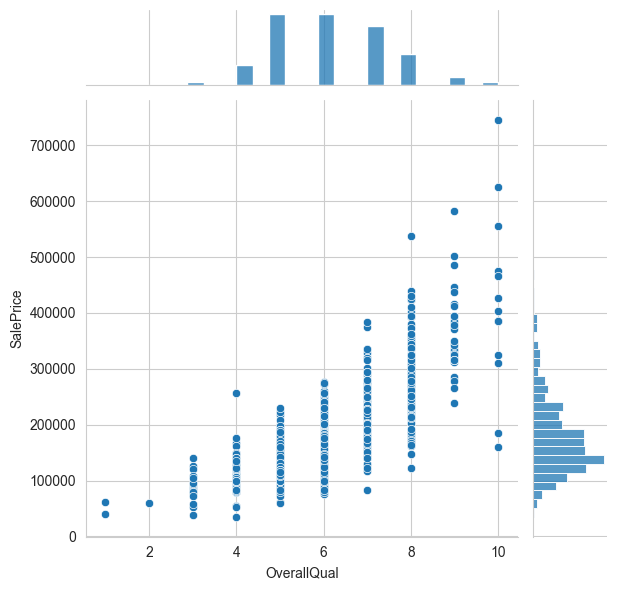

In [19]:
# Visualizando a correlação com o target
sns.jointplot(x = X_train['OverallQual'], y = y_train);

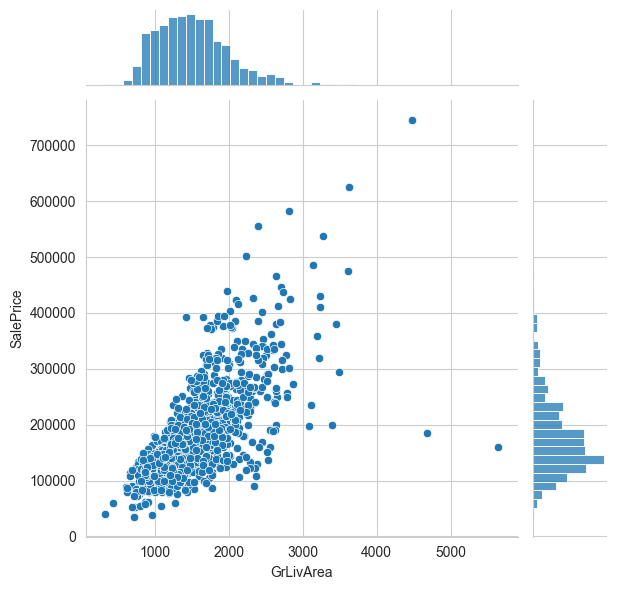

In [20]:
# Visualizando a correlação com o target
sns.jointplot(x = X_train['GrLivArea'], y = y_train);

In [21]:
# Identificando os outliers
outliers = X_train.query('GrLivArea > 4500').index
outliers

Int64Index([523, 1298], dtype='int64')

In [22]:
# Retirando os outliers para fins didáticos e modelo baseline
y_train = y_train.drop(index=outliers)
X_train = X_train.drop(index=outliers)

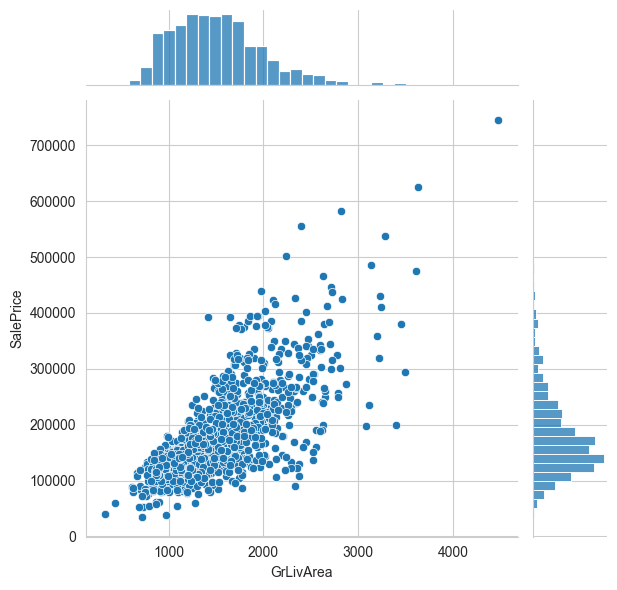

In [23]:
# Conferindo se os outliers foram retirados
sns.jointplot(x = X_train['GrLivArea'], y = y_train);

In [24]:
# Instanciando a classe criando um objeto
reg_lin = LinearRegression()
# Treinando o modelo
reg_lin.fit(X_train['GrLivArea'].values.reshape(-1,1), y_train)

LinearRegression()

In [ ]:
# reg_lin = LinearRegression().fit(X_train['GrLivArea'].values.reshape(-1,1), y_train)

In [25]:
# atributos do modelo (intercept_ == B0 / coef_ == B1)
vars(reg_lin)

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([112.12517083]),
 'rank_': 1,
 'singular_': array([17148.49137244]),
 'intercept_': 10895.38004325694}

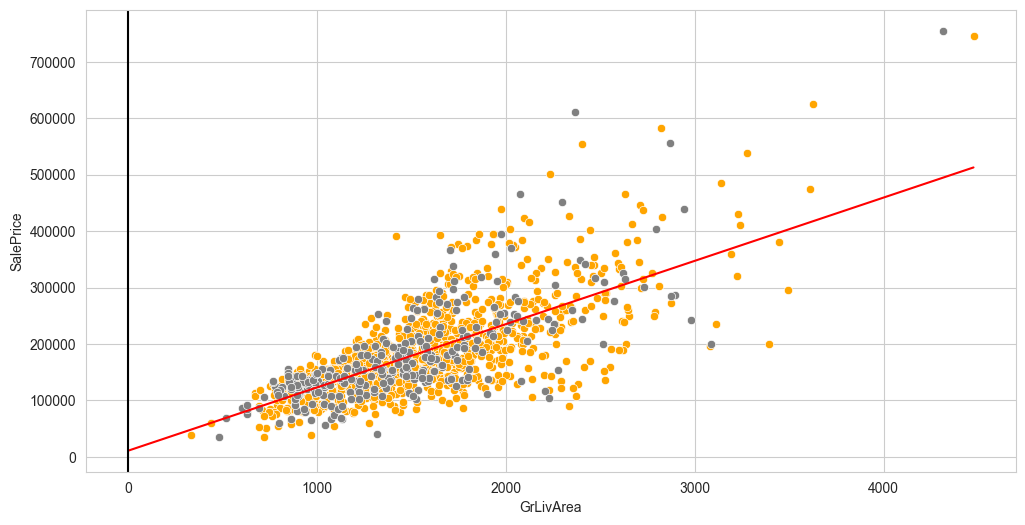

In [52]:
# Visualizando o modelo
plt.figure(figsize=(12,6))
sns.scatterplot(x = X_train['GrLivArea'], y = y_train, color='orange')
sns.scatterplot(x = X_test['GrLivArea'], y = y_test, color='gray')

x = np.linspace(0, X_train['GrLivArea'].max(), 100)
y = reg_lin.intercept_ + reg_lin.coef_[0] * x

plt.plot(x, y, color = 'red')
plt.axvline(x= 0, color = 'black');


In [53]:
# Fazer uma previsão com input de forma manual
x = 3000
y = reg_lin.predict([[x]])
y

array([347270.89252584])

In [56]:
# Passando base de teste para predizer e avaliação
y_pred = reg_lin.predict(X_test['GrLivArea'].values.reshape(-1,1)).round(2)
y_pred

array([130645.06, 304887.58, 126160.06, 197471.66, 192538.16,  81534.24,
       229987.96, 174149.63,  81534.24, 167085.74, 176504.26, 108892.78,
       111135.28, 183007.52, 200386.92, 123917.55, 203750.67, 138045.32,
       124366.05, 176728.51, 213057.06, 189174.4 , 176392.13, 115844.54,
       171346.5 , 145333.46, 161143.11, 107771.53, 190744.15, 162488.61,
       151276.09, 240303.48, 356913.66, 117638.54, 194332.16, 138269.57,
       224381.71, 227072.71, 293450.81, 109789.78, 142754.58, 247479.49,
       117414.29, 239854.98, 121675.05, 258692.01, 113153.54, 117974.92,
       268334.77, 181774.14, 121675.05, 186595.52, 157106.6 , 335834.13,
       105977.52, 205320.43, 209917.56, 137148.32, 136139.2 , 103622.9 ,
        69200.47, 150603.34, 288180.93, 179755.89, 210029.68, 252861.5 ,
       126832.81, 264522.52, 120105.3 , 174373.88, 183007.52, 146678.96,
       112592.91, 127505.56, 275959.28, 155648.98, 279098.79, 282014.04,
       139839.33,  98353.01, 121562.92, 131654.19, 

In [57]:
y_test

892     154500
1105    325000
413     115000
522     159000
1036    315500
         ...  
479      89471
1361    260000
802     189000
651     108000
722     124500
Name: SalePrice, Length: 292, dtype: int64

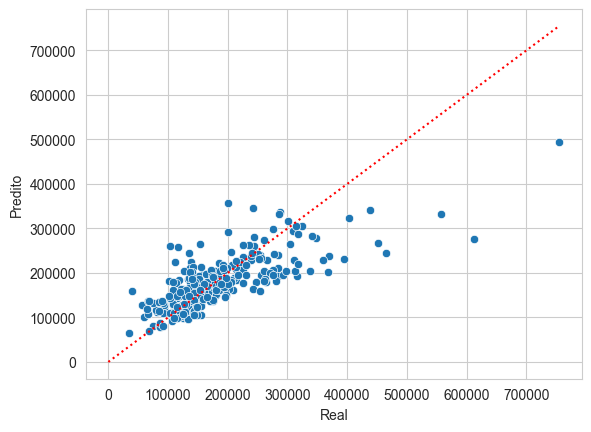

In [29]:
# Visualizando Predito x Real
x = np.linspace(0, y_test.max())
y = x
plt.plot(x, y, color = 'red', ls = ':')
sns.scatterplot(x = y_test, y = y_pred)
plt.xlabel('Real')
plt.ylabel('Predito');


In [30]:
# Quanto maior o r² menos dispersos serão da reta, é calculado com modelo da média
r2_score(y_test, y_pred)

0.5675383111402961

In [31]:
# Resíduos do modelo
residuos = y_test - y_pred
residuos

892      23854.94
1105     20112.42
413     -11160.06
522     -38471.66
1036    122961.84
          ...    
479     -48237.95
1361     77553.11
802      14850.37
651     -72204.39
722      16728.47
Name: SalePrice, Length: 292, dtype: float64

count       292.000000
mean       3376.936062
std       57594.082908
min     -156822.390000
25%      -29205.515000
50%        -176.810000
75%       22218.205000
max      335697.720000
Name: SalePrice, dtype: float64

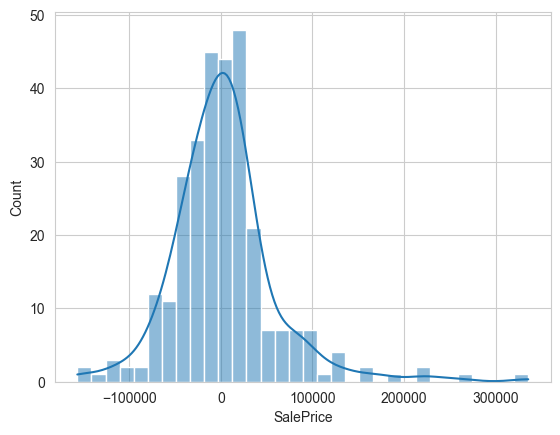

In [32]:
# Distribuição dos resíduos, viés positivo (predito menor que o real)
sns.histplot(residuos, kde=True); residuos.describe()

In [64]:
print(f'MAE: {mean_absolute_error(y_test, y_pred):.2f} -> de erro pra cima ou pra baixo')
print(f'MSE: {mean_squared_error(y_test, y_pred):.2f} -> penaliza os erros maiores numa escala quadrática')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f} -> penaliza os erros maiores na mesma escala do target')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred):.2f} -> percentual de erro ')

MAE: 38473.85 -> de erro pra cima ou pra baixo
MSE: 3317122225.66 -> penaliza os erros maiores numa escala quadrática
RMSE: 57594.46 -> 
MAPE: 0.23


In [66]:
def plot_scatter_real_pred(y_test, y_pred):

    x = np.linspace(0, y_test.max())
    y = x

    plt.title("Target real x target predito")

    plt.plot(x, y, color="red", ls=":")

    sns.scatterplot(x=y_test, y=y_pred)

    plt.xlabel("Real")
    plt.ylabel("Predito")

    plt.show()

In [67]:
def reg_lin_pt1_pt2(X_train, y_train, X_test, y_test, plot=True):

    # ===============================
    # passo 1 - construção do modelo

    reglin = LinearRegression()

    reglin.fit(X_train, y_train)

    # ===============================
    # passo 2 - avaliação do modelo

    y_pred = reglin.predict(X_test)

    print("\nMétricas de avaliação (dados de teste):\n")

    if plot:
        plot_scatter_real_pred(y_test, y_pred)

    print(f"R^2: {r2_score(y_test, y_pred):.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print(f"MAPE: {(mean_absolute_percentage_error(y_test, y_pred))*100:.2f}%")

    residuos = y_test - y_pred
    print("\nDistribuição dos resíduos:\n")
    print(residuos.describe())

    if plot:
        sns.histplot(residuos, kde=True)
        plt.show()


Métricas de avaliação (dados de teste):



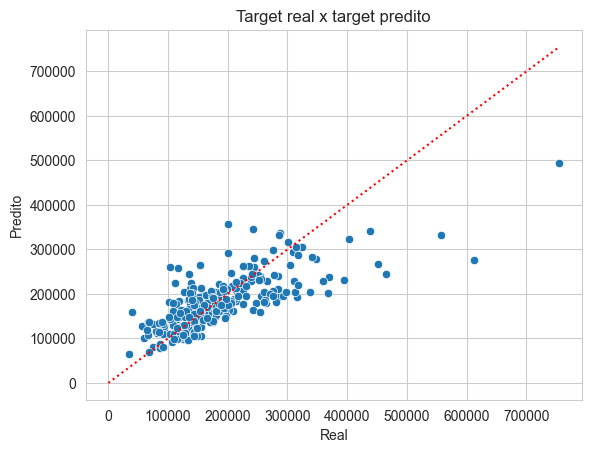

R^2: 0.57
MAE: 38473.84
RMSE: 57594.46
MAPE: 23.34%

Distribuição dos resíduos:

count       292.000000
mean       3376.936012
std       57594.082477
min     -156822.385818
25%      -29205.512403
50%        -176.809412
75%       22218.204254
max      335697.716120
Name: SalePrice, dtype: float64


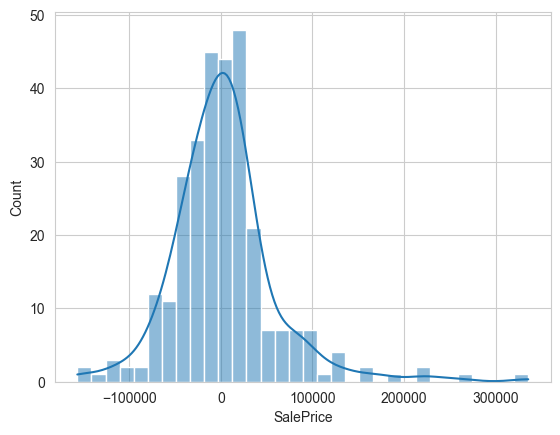

In [68]:
# Chamando função para treinar e plotar modelo de regressão simples
reg_lin_pt1_pt2(X_train["GrLivArea"].values.reshape(-1, 1), y_train,
                X_test["GrLivArea"].values.reshape(-1, 1), y_test,
                plot=True)